# Mobile Device Usage Case Study  
### Data Extraction and Cleaning  
This project analyzes mobile device usage based on the *User Behavior Dataset*.  

**Business Task:**  
Understand how mobile users interact with their devices and prepare the dataset for analysis.

**Dataset Source:**  
Gigsheet – Mobile Device Usage and User Behavior Dataset.

In this notebook, we will:  
1. Import dependencies  
2. Load the dataset  
3. Inspect the structure  
4. Clean invalid or missing data  
5. Prepare the dataset for deeper analysis


In [5]:
# Import core libraries
import pandas as pd
import numpy as np

# Display settings
pd.set_option('display.max_columns', None)


## Loading the Dataset  
The CSV file is stored in the `sample_data` folder in this Colab environment.  
We read the dataset into a dataframe called `device_usage`.


In [6]:
# Load dataset
file_path = "../data/user_behavior_dataset.csv"
device_usage = pd.read_csv(file_path)

# Preview the dataset
device_usage.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## Inspecting the Dataset  
We now check:  
- First few rows  
- Column names  
- Data types  
- Shape of the dataset


In [7]:
print("First 6 rows:")
display(device_usage.head())

print("\nColumn names:")
print(device_usage.columns.tolist())

print("\nData types:")
print(device_usage.dtypes)

print("\nDataset shape:")
print(device_usage.shape)


First 6 rows:


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3



Column names:
['User ID', 'Device Model', 'Operating System', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class']

Data types:
User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

Dataset shape:
(700, 11)


## Checking for Duplicates, Typos, and Invalid Values  
We ensure the dataset has no:  
- Duplicate users  
- Typos in categorical fields  
- Impossible numeric values  


In [8]:
duplicate_count = device_usage["User ID"].duplicated().sum()
print("Number of duplicate User IDs:", duplicate_count)


Number of duplicate User IDs: 0


In [9]:
print("\nDevice Model counts:")
print(device_usage["Device Model"].value_counts())

print("\nOperating System counts:")
print(device_usage["Operating System"].value_counts())

print("\nGender counts:")
print(device_usage["Gender"].value_counts())



Device Model counts:
Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

Operating System counts:
Operating System
Android    554
iOS        146
Name: count, dtype: int64

Gender counts:
Gender
Male      364
Female    336
Name: count, dtype: int64


In [10]:
numeric_columns = [
    "App Usage Time (min/day)",
    "Screen On Time (hours/day)",
    "Battery Drain (mAh/day)",
    "Number of Apps Installed",
    "Data Usage (MB/day)",
    "Age",
    "User Behavior Class"
]

# 1. Values must be non-negative
for col in numeric_columns:
    invalid_negative = device_usage[device_usage[col] < 0]
    print(f"Negative values in '{col}':", len(invalid_negative))


# 2. User Behavior Class must be whole numbers 1–5
invalid_behavior = device_usage[
    (device_usage["User Behavior Class"] < 1) |
    (device_usage["User Behavior Class"] > 5) |
    (device_usage["User Behavior Class"] % 1 != 0)
]
print("\nInvalid User Behavior Class values:", len(invalid_behavior))


# 3. App Usage Time must not exceed 24 * 60 minutes
invalid_app_usage = device_usage[
    device_usage["App Usage Time (min/day)"] > 1440
]
print("Invalid App Usage Time (> 1440 min/day):", len(invalid_app_usage))


# 4. Screen On Time must not exceed 24 hours
invalid_screen_time = device_usage[
    device_usage["Screen On Time (hours/day)"] > 24
]
print("Invalid Screen On Time (> 24 hours):", len(invalid_screen_time))



Negative values in 'App Usage Time (min/day)': 0
Negative values in 'Screen On Time (hours/day)': 0
Negative values in 'Battery Drain (mAh/day)': 0
Negative values in 'Number of Apps Installed': 0
Negative values in 'Data Usage (MB/day)': 0
Negative values in 'Age': 0
Negative values in 'User Behavior Class': 0

Invalid User Behavior Class values: 0
Invalid App Usage Time (> 1440 min/day): 0
Invalid Screen On Time (> 24 hours): 0


## Cleaning the Dataset  
We remove:  
- Null values  
- Out-of-range age values  
- Negative or impossible data points  


In [11]:
print("Missing values before cleaning:")
print(device_usage.isna().sum())

# remove rows with missing values
device_usage = device_usage.dropna()

print("\nMissing values after cleaning:")
print(device_usage.isna().sum())


Missing values before cleaning:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Missing values after cleaning:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


# Final Cleaned Dataset  
The dataframe is now cleaned and ready for analysis.  
Below is the shape and preview of the final dataset.


In [12]:
print("Final dataset shape:", device_usage.shape)
device_usage.head()


Final dataset shape: (700, 11)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# Visualizing and Analyzing Features and Feature Relationships


### Usage Distributions: Summary Statistics
Before looking into how these features look and interact visually we should look into their distributions. Our group defines usage variables: Screen On Time (hours/day),App Usage Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day).

The distributions here help us understand whats typical or normal for the average users, which in turns help drive how we define "high usage" users.

The statistics we will look into are mean, standard deviation, minimum, maximum, (25th, 50th, 75th)percentiles, interquartile range (IQR) and skew.



In [13]:
# Looking at some of the usage columns
usage_cols = [
    "Screen On Time (hours/day)",
    "App Usage Time (min/day)",
    "Battery Drain (mAh/day)",
    "Number of Apps Installed",
    "Data Usage (MB/day)"
]

# Get the basic stats for each of these
usage_summary = device_usage[usage_cols].describe(
    percentiles=[0.25, 0.5, 0.75]
).T

# Add IQR (just Q3 - Q1)
usage_summary["IQR"] = usage_summary["75%"] - usage_summary["25%"]

# Check skewSto see if anything is biased one way
usage_summary["Skew"] = device_usage[usage_cols].skew()

usage_summary

,count,mean,std,min,25%,50%,75%,max,IQR,Skew
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0,4.90,0.459992
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0,321.00,0.372312
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0,1507.25,0.134559
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0,48.00,0.111733
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0,968.00,0.699264


The usage features have a large variability across the 700 users. Screen On Time averages 5.27 hours/day, and its large IQR (4.9 hours) meaning that a "normal" user could range widely from very small to large daily usage, making it hard to quanitfy whats "normal". App Usage Time shows a similar pattern, with an average of 271 minutes/day and a wide IQR (321 minutes), meaning again theres varied engagement across the sample. Battery Drain has the largest spread (IQR 1507 mAh), showing how different users treat their devices. Unlike the other features, the Number of Apps Installed is more stable, centering around 50 apps. Overall, these statistics show that while there are moderate users, the wide IQRs and slight skew righ suggests that there are high usage groups. This section helps set the tone for how we quanitfy heavier users down the line and which relationships we want to investigate and visualize.

### Visualizing Usage Distributions
Here we want to plot histograms (with KDE curves) to help reveal patterns like skew, tails, clusters of users, and ranges of activity. These visuals help us guide the investigation into relationships between features that could be a good indication of high-usage.

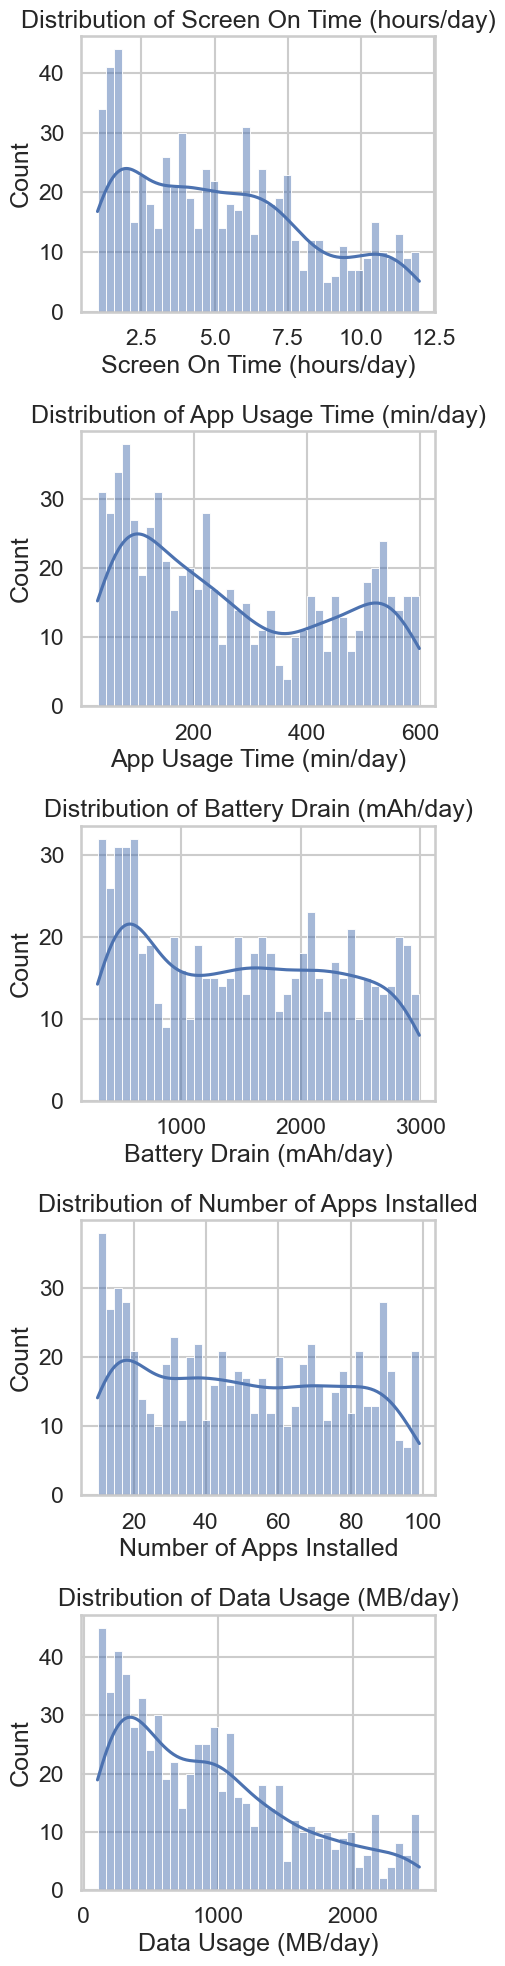

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="talk")

# Making a one plot for each usage column
fig, axes = plt.subplots(5, 1, figsize=(5, 20))
for ax, col in zip(axes, usage_cols):
    # histogram + kde
    sns.histplot(device_usage[col], kde=True, ax=ax, bins=40)
    # adding labels onto plots
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel("Count")
    ax.set_xlabel(col)
plt.tight_layout()
plt.show()

Here are takeaways the distributions:

*   Most users are in average usage ranges, but all of the features show a clear right tail of heavier users.
*   Screen time and app usage both show have spreads, so there is a large variation in engagement patterns   
*   Battery drain and data usage have the strongest tails right, meaning there is a noticeable group of users who use their devices to extremes.
*   Number of apps installed is more balanced indicating it might not prove helpful to "learning" down the line.


### Outlier Investigation with Boxplots
We will use boxplots to visualize the spread of each usage metric but this stands out from previous vizualizations as it helps us identify potential outliers. Boxplots focus on the median, IQR and min/max values. These outliers points represent users with unusually activity, making them model indicators of heavy-usage. These extremes here helps set the stage when we analyze how these high-usage patterns relate to other metrics.


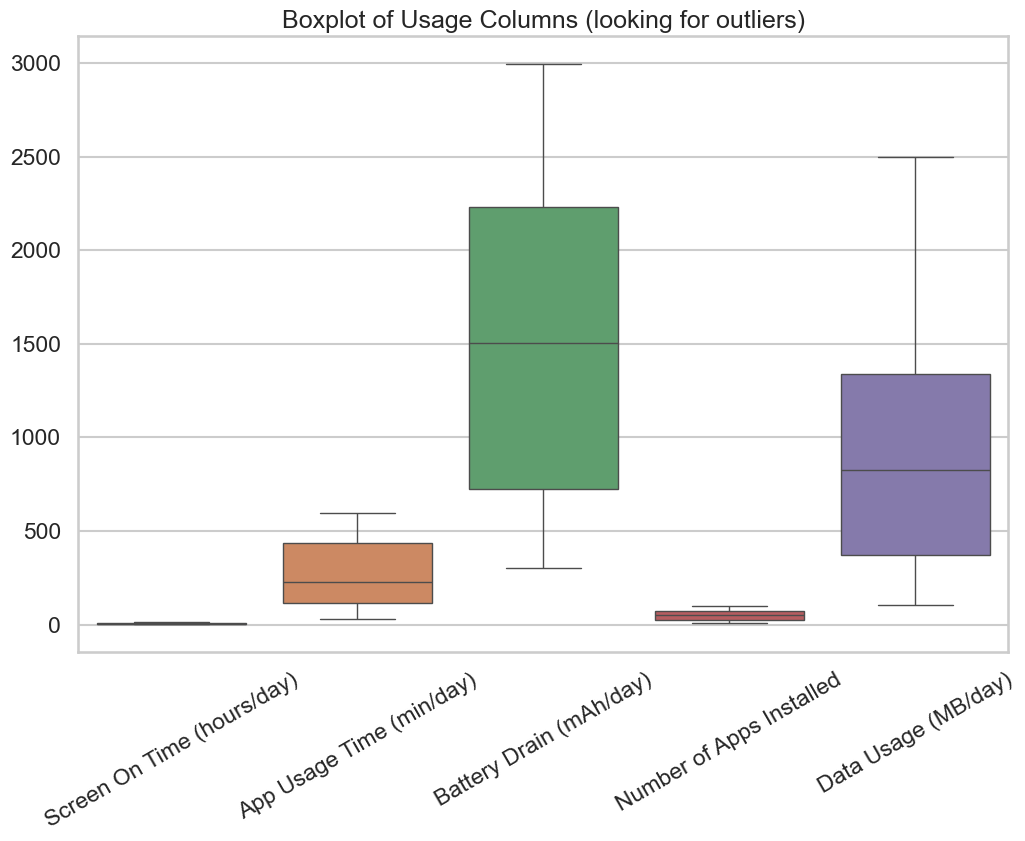

In [15]:
# Boxplot to quickly check for any outliers in the usage data
plt.figure(figsize=(12,8))
sns.boxplot(data=device_usage[usage_cols])

plt.title("Boxplot of Usage Columns (looking for outliers)")
plt.xticks(rotation=30)
plt.show()


The boxplot mainly helps us confirm where we suspected the outliers are across each of the usage metrics. We can clearly see that each feature has users who sit above the typical range, especially in Battery Drain and Data Usage. These upper-end outliers are the users with very unusual behavior, and they’re the ones we’ll pay special attention to in the relationship analysis. We want to understand what drives their high usage and what markers can help us predict high usage

### Using Percentile Based Thresholds
We look at the 75th and 90th percentiles to get potential cutoff points for what counts as higher-than-normal usage for each category. These thresholds give us data-driven boundaries we can use later for the predictive modeling when defining heavy users or overuse markers.

In [16]:
thresholds = device_usage[usage_cols].quantile([0.75, 0.90]).T
thresholds.columns = ["75th percentile", "90th percentile"]
thresholds

,75th percentile,90th percentile
Screen On Time (hours/day),7.40,10.2
App Usage Time (min/day),434.25,539.0
Battery Drain (mAh/day),2229.50,2711.1
Number of Apps Installed,74.00,89.0
Data Usage (MB/day),1341.00,1924.4


### Scatterplot of Feature Relationships

Based on what we saw in the earlier analysis and visualizations some features appear to move together or reflect related trends in phone behavior. We focus on four relationships that are supported by the earlier insights:

- Screen Time vs. Battery Drain: Longer screen time is one of the strongest a cause of power consumption, so we expect a positive relationship

- App Usage Time vs. Data Usage: Many popular apps (social media, streaming, messaging) use data at higher rates.

- Number of Apps Installed vs. Screen Time: Users with many apps may user their device more frequently, so we will check whether app count translates into higher daily usage.

- Age vs. Number of Apps Installed: Younger users often install more apps and are percieved to use their phones more, while older users may be more reluctant; examining this trend helps us understand if app counts follow age patterns.


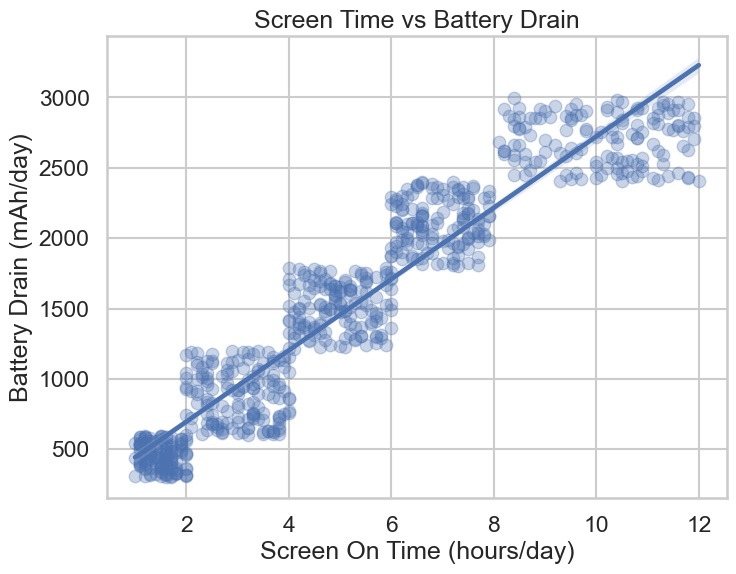

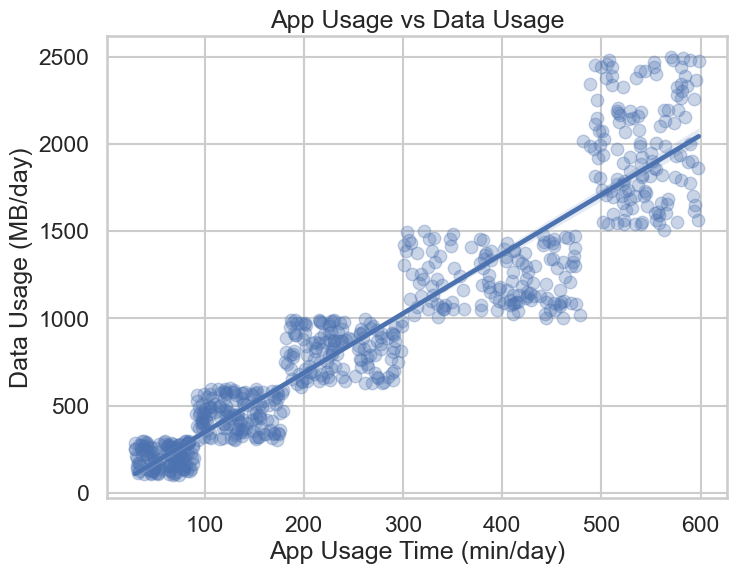

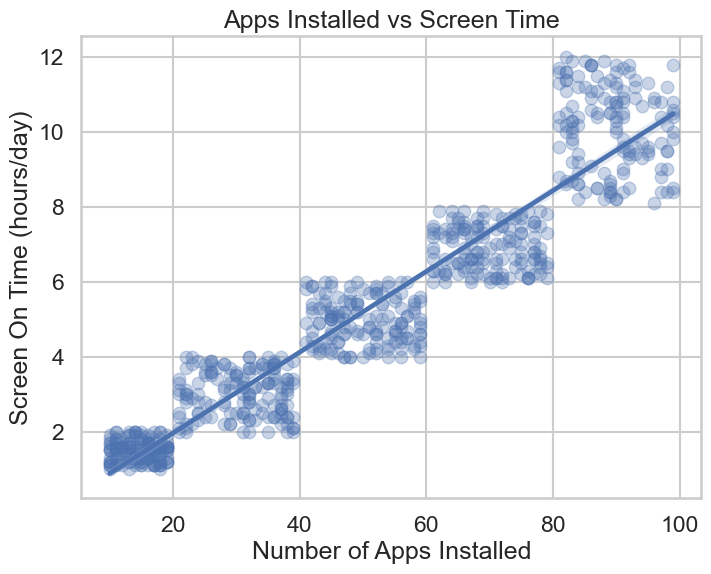

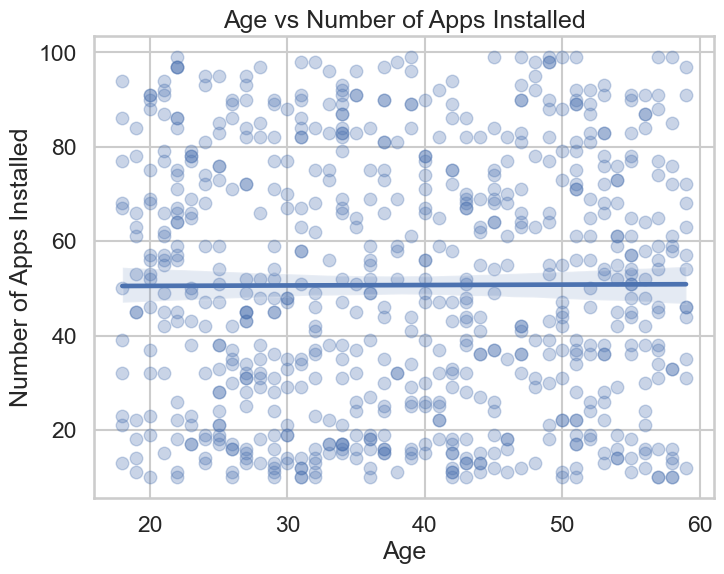

In [17]:
# Trying out some simple regression plots to see how features relate

# Screen time vs battery drain
plt.figure(figsize=(8,6))
sns.regplot(
    data=device_usage,
    x="Screen On Time (hours/day)",
    y="Battery Drain (mAh/day)",
    scatter_kws={"alpha": 0.3}
)
plt.title("Screen Time vs Battery Drain")
plt.show()


# App usage vs data usage (expecting these to be related)
plt.figure(figsize=(8,6))
sns.regplot(
    data=device_usage,
    x="App Usage Time (min/day)",
    y="Data Usage (MB/day)",
    scatter_kws={"alpha": 0.3}
)
plt.title("App Usage vs Data Usage")
plt.show()


# Do people with more apps spend more time on their phone?
plt.figure(figsize=(8,6))
sns.regplot(
    data=device_usage,
    x="Number of Apps Installed",
    y="Screen On Time (hours/day)",
    scatter_kws={"alpha": 0.3}
)
plt.title("Apps Installed vs Screen Time")
plt.show()


# Checking if older users install fewer apps
plt.figure(figsize=(8,6))
sns.regplot(
    data=device_usage,
    x="Age",
    y="Number of Apps Installed",
    scatter_kws={"alpha": 0.3}
)
plt.title("Age vs Number of Apps Installed")
plt.show()


Takeaways

*   App Usage vs Data Usage: There is a linear relationship meaning as app usage increases as does data usage. This confirms that heavier app usage directly translates to higher data usage, notably in steps.

*   Screen Time vs Battery Drain: Screen time is highly correlated with battery drain. Users who higher screen time consistently had higher power consumption.


*   App Count vs Screen Time: There is once again a postive trend where users with more apps tend to spend more time on their devices. This supports the idea that users who have more apps engage more frequently with their phones and for longer durations.


*   Age vs Apps Count: This stands out as there is no meaningful relationship in the plot. App count remains the same across ages, indicating that installation patterns are not age-dependent in this sample.

In [18]:
# checking how strongly each pair of variables is related, not visually

pair1 = device_usage[["App Usage Time (min/day)", "Data Usage (MB/day)"]].corr().iloc[0,1]
pair2 = device_usage[["Screen On Time (hours/day)", "Battery Drain (mAh/day)"]].corr().iloc[0,1]
pair3 = device_usage[["Number of Apps Installed", "Screen On Time (hours/day)"]].corr().iloc[0,1]
pair4 = device_usage[["Age", "Number of Apps Installed"]].corr().iloc[0,1]

partial_corr_df = pd.DataFrame({
    "features": [
        "App Usage vs Data Usage",
        "Screen Time vs Battery Drain",
        "App Count vs Screen Time",
        "Age vs App Count"
    ],
    "corr": [pair1, pair2, pair3, pair4]
})

partial_corr_df


,features,corr
0,App Usage vs Data Usage,0.942308
1,Screen Time vs Battery Drain,0.948983
2,App Count vs Screen Time,0.946975
3,Age vs App Count,0.004034


The correlation df confirms what we saw earlier in the scatterplots: the first three pairs all correlate strongly, while age vs app count show no relationship.


## Exploring Potential High-Usage Definitions with Percentile Cutoffs

Since Screen Time and Battery Drain showed the widest spreads in our earlier analysis, one way to explore potential heavy-use patterns is to look at users above the 75th percentile for these metrics. This isn’t a final definition of “high usage,” but it gives us a simple, data-driven way to visualize how users cluster based on higher screen engagement and battery consumption. The categories (“high,” “lower,” and “mixed”) help us get an sense of where heavier users might be in the overall population based off of these features.

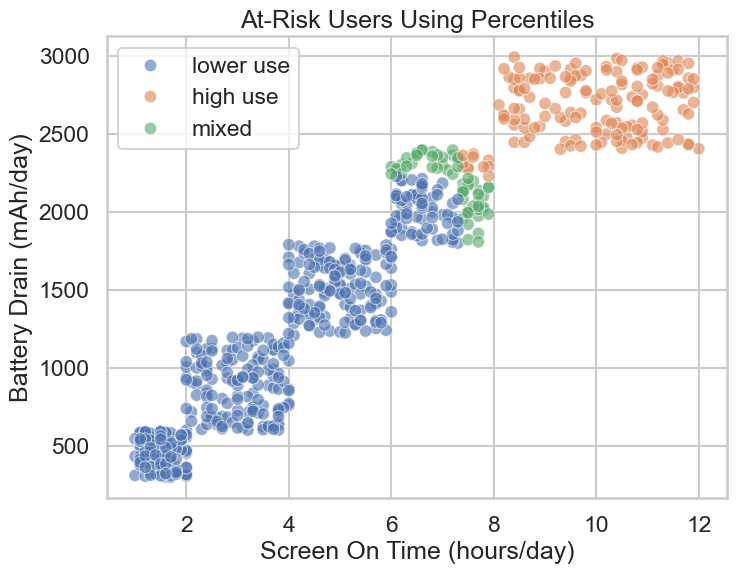

In [19]:
# Using the 75th percentile as a cutoff for "high use"
screen_75 = device_usage["Screen On Time (hours/day)"].quantile(0.75)
battery_75 = device_usage["Battery Drain (mAh/day)"].quantile(0.75)

# label each user (like categories) of high use for one or both or neither
def usage_label(row):
    st = row["Screen On Time (hours/day)"]
    bt = row["Battery Drain (mAh/day)"]

    # top 25% in BOTH screen time + battery drain
    if st >= screen_75 and bt >= battery_75:
        return "high use"
    # below both thresholds → probably lighter users
    elif st < screen_75 and bt < battery_75:
        return "lower use"
    # anything else just calling "mixed"
    else:
        return "mixed"

device_usage["usage"] = device_usage.apply(usage_label, axis=1)

# plotting to visualize how the categories look
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=device_usage,
    x="Screen On Time (hours/day)",
    y="Battery Drain (mAh/day)",
    hue="usage",
    alpha=0.6
)

plt.title("At-Risk Users Using Percentiles")
plt.legend()
plt.show()


## Correlation Heat Map

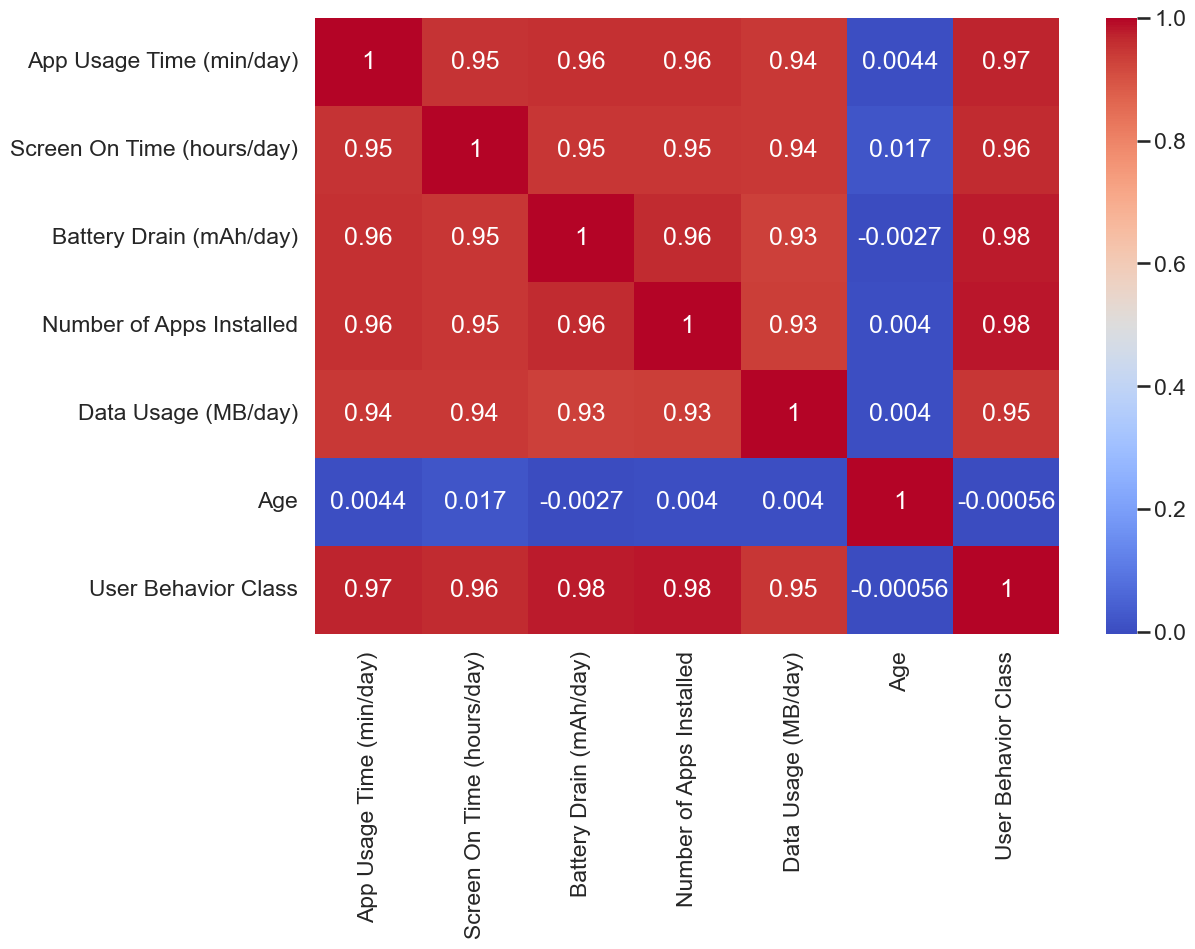

In [20]:
path_to_cleaned = "../data/user_behavior_dataset.csv"
df = pd.read_csv(path_to_cleaned)
NUMERIC_COLUMNS = [
	"App Usage Time (min/day)",
	"Screen On Time (hours/day)",
	"Battery Drain (mAh/day)",
	"Number of Apps Installed",
	"Data Usage (MB/day)",
	"Age",
	"User Behavior Class",
]
num_df = df[NUMERIC_COLUMNS]
corr = num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


* Strong correlations among App Usage Time, Screen On time, Battery Drain, Apps Installed, User Behavior Class and Data Usage.
* These is probably due to them all being related to high deceive activity.
* Age shows near zero correlation between other numerical variables.


## Persona Summary

In [21]:
persona_stats = df.drop(['User ID'], axis=1).groupby('User Behavior Class').mean(numeric_only=True)
persona_stats

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
User Behavior Class,,,,,,
1,60.426471,1.490441,454.977941,14.558824,202.323529,38.213235
2,131.972603,3.037671,883.808219,30.753425,451.417808,38.643836
3,235.398601,4.955944,1515.055944,50.000000,822.013986,38.678322
4,395.748201,6.909353,2105.805755,69.920863,1232.230216,38.676259
5,541.419118,10.114706,2701.014706,89.250000,1974.772059,38.176471


* All variables increases as we go up the User Behavior Class.
* Age remains constant around 38 confirming that age doesn't help in identifying at risk user. 